In [23]:
import sys 
sys.path.append('..')

import numpy as np
from networks import *
from utils import *
from losses import *
from torch.distributions.normal import Normal
import matplotlib.pyplot as plt
import scipy.fftpack


In [24]:
N = 28*28
T = 1. / 2500.
x = np.linspace(-N*T, N*T, N)

In [25]:
sine = np.sin(2*np.pi*30*x)  + np.sin(2*np.pi*50*x)
gauss = torch.exp(Normal(torch.tensor([0.]), torch.tensor([0.1])).log_prob(torch.from_numpy(x))).numpy()
delta = torch.exp(Normal(torch.tensor([0.]), torch.tensor([1e-3])).log_prob(torch.from_numpy(x))).numpy()
rand = np.random.rand(len(x))#*2 -1
mnist3 = np.array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  38,  43, 105,
         255, 253, 253, 253, 253, 253, 174,   6,   0,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,  43, 139, 224, 226, 252,
         253, 252, 252, 252, 252, 252, 252, 158,  14,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0, 178, 252, 252, 252, 252,
         253, 252, 252, 252, 252, 252, 252, 252,  59,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0, 109, 252, 252, 230, 132,
         133, 132, 132, 189, 252, 252, 252, 252,  59,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   4,  29,  29,  24,   0,
           0,   0,   0,  14, 226, 252, 252, 172,   7,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,  85, 243, 252, 252, 144,   0,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,  88, 189, 252, 252, 252,  14,   0,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          91, 212, 247, 252, 252, 252, 204,   9,   0,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,  32, 125, 193, 193, 193,
         253, 252, 252, 252, 238, 102,  28,   0,   0,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,  45, 222, 252, 252, 252, 252,
         253, 252, 252, 252, 177,   0,   0,   0,   0,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,  45, 223, 253, 253, 253, 253,
         255, 253, 253, 253, 253,  74,   0,   0,   0,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,  31, 123,  52,  44,  44,
          44,  44, 143, 252, 252,  74,   0,   0,   0,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,  15, 252, 252,  74,   0,   0,   0,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,  86, 252, 252,  74,   0,   0,   0,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   5,  75,   9,   0,   0,   0,   0,   0,
           0,  98, 242, 252, 252,  74,   0,   0,   0,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,  61, 183, 252,  29,   0,   0,   0,   0,  18,
          92, 239, 252, 252, 243,  65,   0,   0,   0,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0, 208, 252, 252, 147, 134, 134, 134, 134, 203,
         253, 252, 252, 188,  83,   0,   0,   0,   0,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0, 208, 252, 252, 252, 252, 252, 252, 252, 252,
         253, 230, 153,   8,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,  49, 157, 252, 252, 252, 252, 252, 217, 207,
         146,  45,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   7, 103, 235, 252, 172, 103,  24,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0]],
       dtype=np.uint8)#.flatten() 

In [26]:
def inspect_filter_norm(s):
    fig, ax = plt.subplots(1, 4, figsize=(19,4))
    ax[0].plot(x, s)

    sf = scipy.fftpack.fft(s)
    # sf = sf / np.max(np.abs(np.real(sf)))

    xf = np.linspace(0.0, 1.0/(4.0*T), N//2)
    ax[1].plot(xf, 2.0/N * np.abs(sf[:N//2]))
    ax[1].grid()

    sf_norm_minus_direct = np.delete(sf, np.where(sf == np.max(np.abs(sf))))

    sf_norm = sf / np.max(np.abs(sf_norm_minus_direct)) #np.sqrt(np.sum(sf**2))
    ax[2].plot(xf, np.abs(sf_norm[:N//2]))
    ax[2].grid()

    sr = np.real(scipy.fftpack.ifft(sf_norm))
    ax[3].plot(x, sr, "--")

    plt.show()

    return s, sf, sf_norm, sr

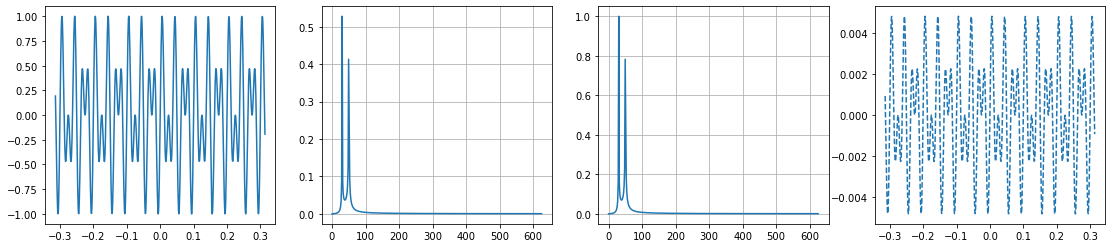

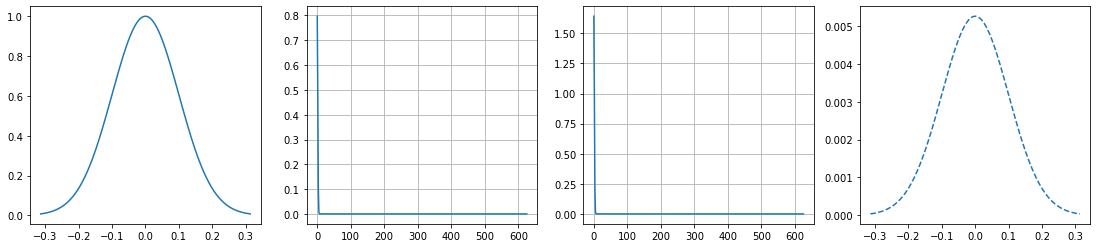

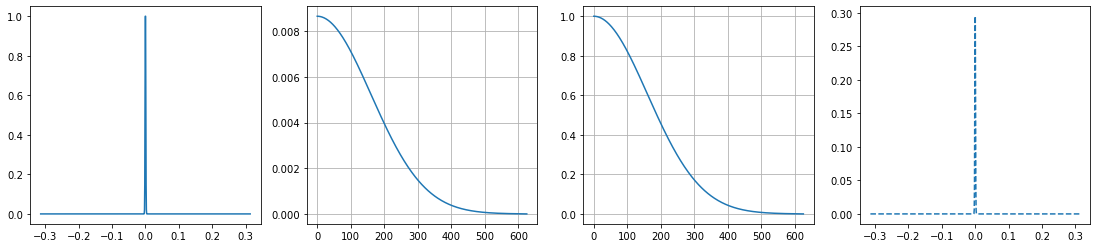

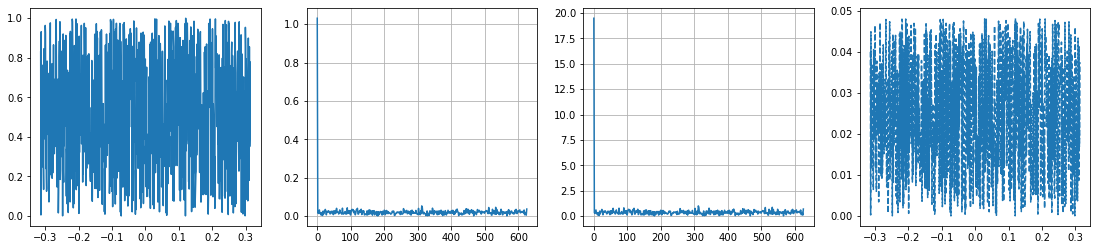

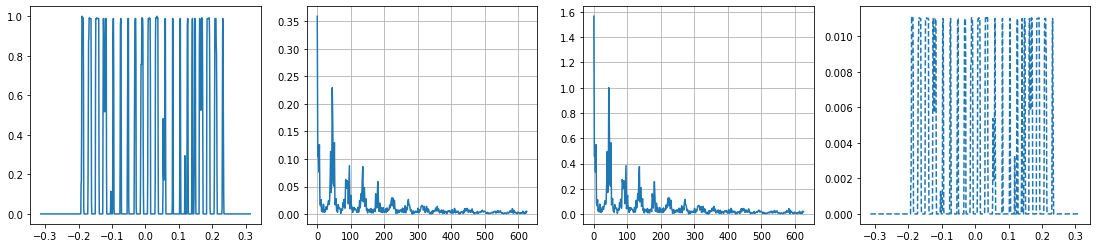

In [27]:
signals = [sine, gauss, delta, rand, mnist3.flatten()]
signals = [s / s.max() for s in signals]
for s in signals:
    inspect_filter_norm(s)

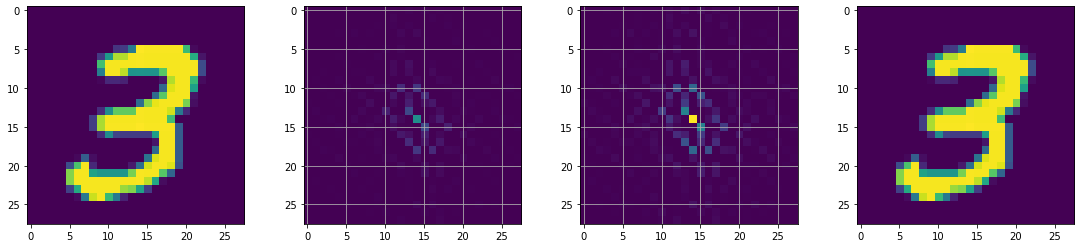

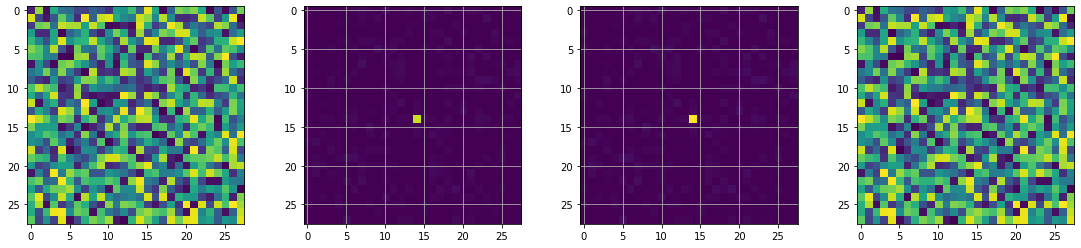

In [29]:
def inspect_filter_norm2d(s):
    fig, ax = plt.subplots(1, 4, figsize=(19,4))
    ax[0].imshow(s)

    sf = scipy.fftpack.fft2(s)
    sf = sf / np.sqrt(np.sum(np.real(sf)**2))
    sf = scipy.fft.fftshift(sf)
    
    ax[1].imshow(np.real(sf), vmin=0., vmax=1)
    ax[1].grid()

    sf_norm_minus_direct = np.delete(sf, np.where(sf == np.max(np.abs(sf))))

    sf_norm = sf / np.max(np.abs(sf_norm_minus_direct)) #np.sqrt(np.sum(sf**2))
    ax[2].imshow(np.real(sf_norm), vmin=0., vmax=1)
    ax[2].grid()

        
    # fig = plt.figure()
    # plt.plot(sf_norm.flatten())
    # plt.show()

    
    sr = scipy.fftpack.ifft2(scipy.fft.ifftshift(sf_norm))
    ax[3].imshow(np.real(sr))

    plt.show()

    return s, sf, sf_norm, sr

mnist3, mnist3f, mnist3f_norm, mnist3r = inspect_filter_norm2d(mnist3)

rand, randf, randf_norm, randr = inspect_filter_norm2d(np.random.rand(mnist3.shape[0], mnist3.shape[1]))

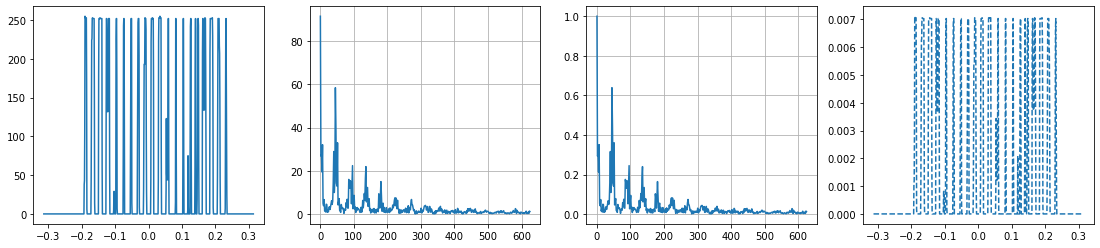

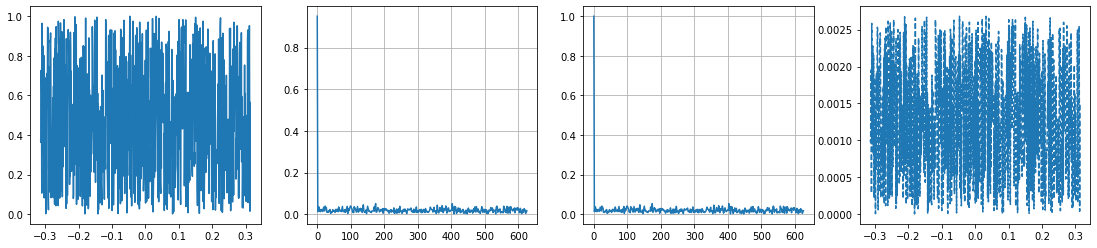

In [17]:
mnist3, mnist3f, mnist3f_norm, mnist3r = inspect_filter_norm(mnist3.flatten())
rand, randf, randf_norm, randr = inspect_filter_norm(rand.flatten())

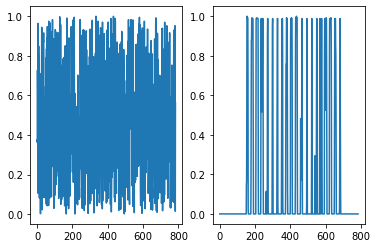

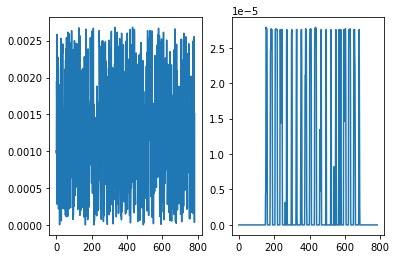

/home/dp4018/miniconda3/envs/mltorch/lib/python3.9/site-packages/torch/_tensor.py:680: ComplexWarning: Casting complex values to real discards the imaginary part
  return self.numpy().astype(dtype, copy=False)
/home/dp4018/miniconda3/envs/mltorch/lib/python3.9/site-packages/torch/_tensor.py:680: ComplexWarning: Casting complex values to real discards the imaginary part
  return self.numpy().astype(dtype, copy=False)


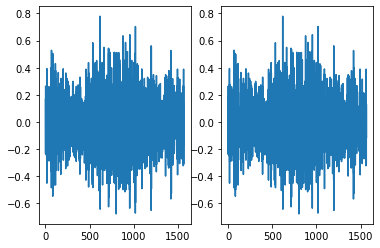

In [18]:
awloss = AWLoss(epsilon=3e-5, store_filters="unorm", method="fft", filter_dim=1)

input, target = torch.from_numpy(rand).unsqueeze(0), torch.from_numpy(mnist3).unsqueeze(0) / 255.
awloss(input, target)
v1= awloss.filters[0]
fig, axs = plt.subplots(1, 2)
axs[0].plot(input[0])
axs[1].plot(target[0])
plt.show()



input, target = torch.from_numpy(randr).unsqueeze(0), torch.from_numpy(mnist3r).unsqueeze(0) / 255.
awloss(input, target)
v2 = awloss.filters[0]
fig, axs = plt.subplots(1, 2)
axs[0].plot(input[0])
axs[1].plot(target[0])
plt.show()

fig, axs = plt.subplots(1, 2)
axs[0].plot(v1)
axs[1].plot(v1)
plt.show()


In [19]:
# import numpy as np
# import matplotlib.pyplot as plt
# import scipy.fftpack

# # Number of samplepoints
# N = 600
# # sample spacing
# T = 1.0 / 800.0
# x = np.linspace(-N*T, N*T, N)
# y = np.sin(50.0 * 2.0*np.pi*x) + 0.5*np.sin(80.0 * 2.0*np.pi*x)
# yf = scipy.fftpack.fft(y)
# xf = np.linspace(0.0, 1.0/(4.0*T), N//2)

# fig, ax = plt.subplots()
# ax.plot(xf, 2.0/N * np.abs(yf[:N//2]))
# plt.grid()
# plt.show()